##**Пример расчёта**

https://github.com/lthurner/pandapower/blob/develop/tutorials/shortcircuit.ipynb

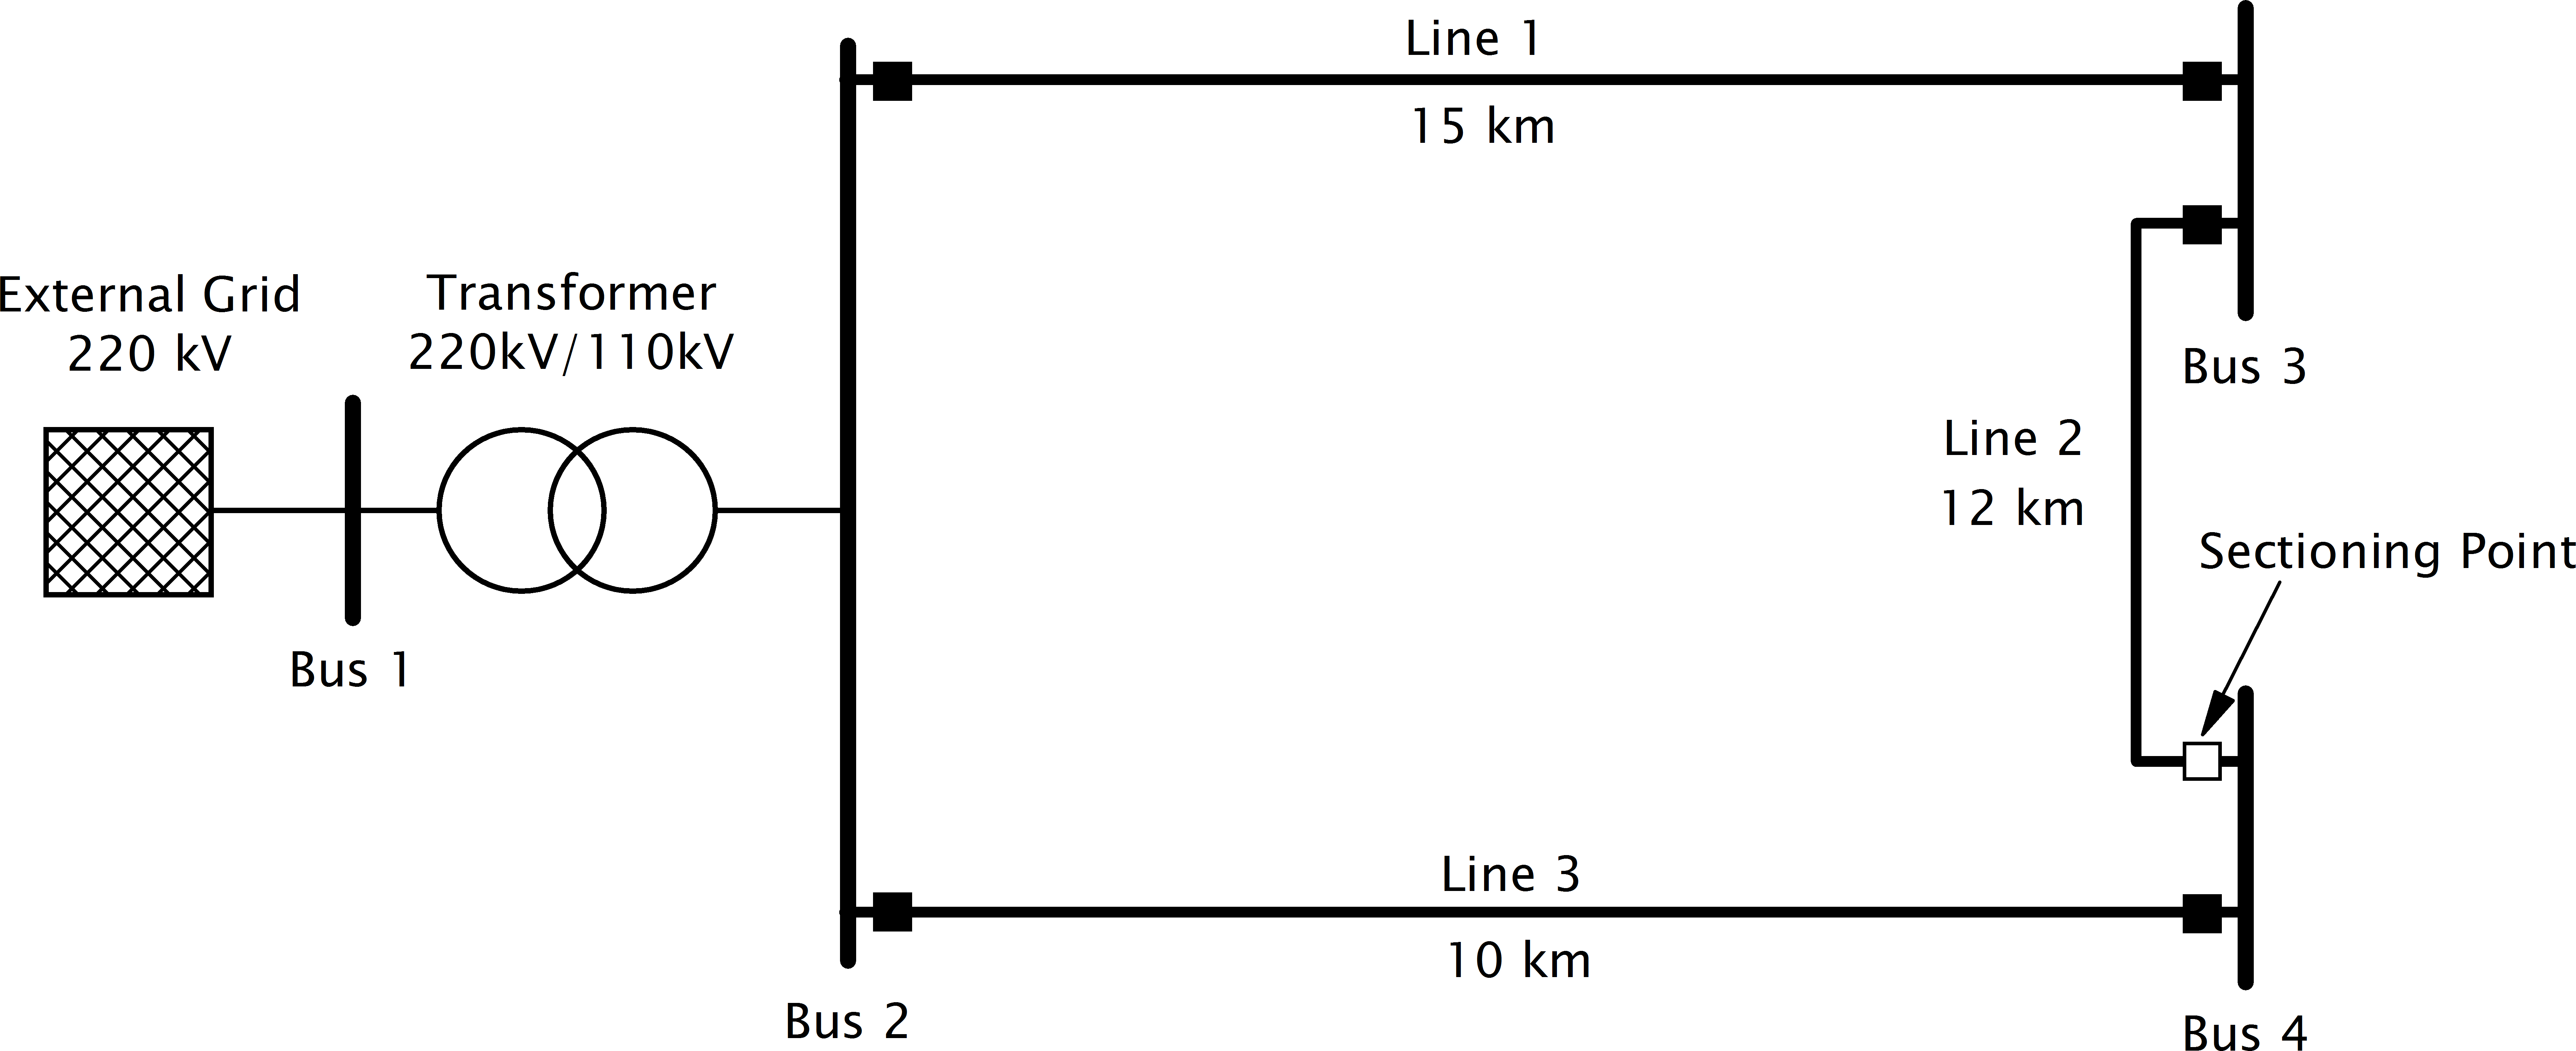

ikss (периодическая составляющая тока КЗ)\
ip (Пиковый ток КЗ)\
ith (термический ток КЗ)

In [ ]:
import pandapower as pp
import pandapower.shortcircuit as sc

def ring_network():
    net = pp.create_empty_network()
    b1 = pp.create_bus(net, 220)
    b2 = pp.create_bus(net, 110)
    b3 = pp.create_bus(net, 110)
    b4 = pp.create_bus(net, 110)
    pp.create_ext_grid(net, b1, s_sc_max_mva=100., s_sc_min_mva=80., rx_min=0.20, rx_max=0.35)
    pp.create_transformer(net, b1, b2, "100 MVA 220/110 kV")
    pp.create_line(net, b2, b3, std_type="N2XS(FL)2Y 1x120 RM/35 64/110 kV" , length_km=15.)
    l2 = pp.create_line(net, b3, b4, std_type="N2XS(FL)2Y 1x120 RM/35 64/110 kV" , length_km=12.)
    pp.create_line(net, b4, b2, std_type="N2XS(FL)2Y 1x120 RM/35 64/110 kV" , length_km=10.)
    pp.create_switch(net, b4, l2, closed=False, et="l")
    return net

Создание параметров синхронных генераторов

In [ ]:
pp.create_gen(net, 2, p_mw=0, vm_pu=1.0, cos_phi=0.8, vn_kv=22, sn_mva=5, xdss_pu=0.2, rdss_pu=0.005)
net

**Symmetric Short-Circuit Calculation**

при расчёте тока КЗ в кольцевых схемах необходимо разомкнуть один из выключателей для того, чтобы избежать уравнительных токов

*Maximum Short Circuit Currents*

In [ ]:
net = ring_network()
sc.calc_sc(net, case="max", ip=True, ith=True, branch_results=True)
net.res_bus_sc

In [ ]:
net.res_line_sc

In [ ]:
net.res_trafo_sc

*Minimum Short Circuit Currents*

In [ ]:
net = ring_network()
net.line["endtemp_degree"] = 80
sc.calc_sc(net, case="min", ith=True, ip=True, branch_results=True)
net.res_bus_sc

In [ ]:
net.res_line_sc

In [ ]:
net.res_trafo_sc

**Asymetrical Two-Phase Short-Circuit Calculation**

In [ ]:
net = ring_network()
sc.calc_sc(net, fault="2ph", ip=True, ith=True)
net.res_bus_sc

NameError: name 'ring_network' is not defined

In [ ]:
net = ring_network()
net.line["endtemp_degree"] = 150
sc.calc_sc(net, fault="2ph", case="min", ip=True, ith=True)
net.res_bus_sc

NameError: name 'ring_network' is not defined

Библиотека Matplotlib

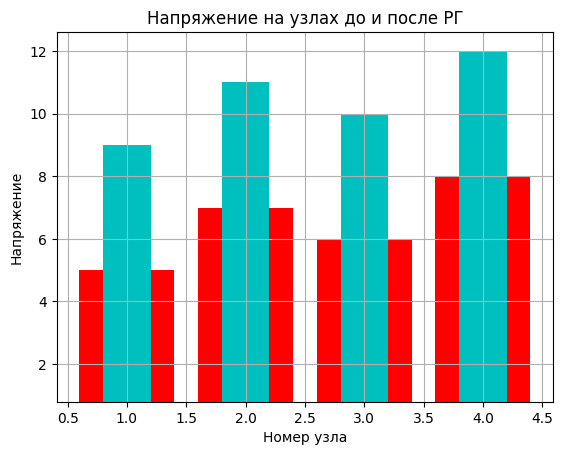

In [ ]:
#пример кода визуализации с помощью гистограмм с наложением
import matplotlib.pyplot as plt

x1 = [1,2,3,4]
y1 = [5,7,6,8]
x2 = [1,2,3,4]
y2 = [9,11,10,12]

fig, ax = plt.subplots()

U1 = ax.bar(x1, y1, color = 'r', width = 0.8)
U2 = ax.bar(x2, y2, color = 'c', width = 0.4)
plt.ylim(bottom=0.8)
plt.title("Напряжение на узлах до и после РГ")
plt.xlabel("Номер узла")
plt.ylabel("Напряжение")
plt.grid()
plt.show()

##**Решение**

Исходные данные

In [ ]:
#сверхпереходные сопротивления генераторов

#номинальная мощность генератора

#номинальное напряжение генератора

#коэффициент мощности генератора

Функция с исходной моделью

**Расчёт трехфазного КЗ**

*максимальная мощность КЗ*

*минимальная мощность КЗ*

Расчёт двухфазного КЗ

*максимальная мощность КЗ*

*минимальная мощность КЗ*

Сравнительные графики токов КЗ узлах

Вывод